In [2]:
Attribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None

    Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [3]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report  

In [4]:
#loading data set


In [5]:
bank = pd.read_csv("bank-full.csv",delimiter=';')


In [6]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
#EDA

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
# factorization method
bank.job.unique()


array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [11]:
bank.job.map({'management':0, 'technician':1,'entrepreneur':2,'blue-collar':3,'unknown':4,'retired':5,'admin.':6,'services':7,'self-employed':8,'unemployed':9,'housemaid':10,'student':11})


0        0
1        1
2        2
3        3
4        4
        ..
45206    1
45207    5
45208    5
45209    3
45210    2
Name: job, Length: 45211, dtype: int64

In [12]:
bank.job.factorize()


(array([0, 1, 2, ..., 5, 3, 2], dtype=int64),
 Index(['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown',
        'retired', 'admin.', 'services', 'self-employed', 'unemployed',
        'housemaid', 'student'],
       dtype='object'))

In [13]:
bank['job'] = bank.job.factorize()[0]
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,1,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,3,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,4,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,5,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,5,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,3,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [14]:
bank.marital.unique()


array(['married', 'single', 'divorced'], dtype=object)

In [15]:
bank.marital.map({'married':0,'single':1,'single':2})

0        0.0
1        2.0
2        0.0
3        0.0
4        2.0
        ... 
45206    0.0
45207    NaN
45208    0.0
45209    0.0
45210    0.0
Name: marital, Length: 45211, dtype: float64

In [16]:
bank['marital'] = bank.marital.factorize()[0]

bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,1,1,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,0,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,3,0,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,4,1,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,5,2,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,5,0,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,3,0,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [17]:
bank.education.unique()


array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [18]:
bank.education.map({'tertiary':0,'secondary':1,'unknown':2,'primary':3})

0        0
1        1
2        1
3        2
4        2
        ..
45206    0
45207    3
45208    1
45209    1
45210    1
Name: education, Length: 45211, dtype: int64

In [19]:
bank['education'] = bank.education.factorize()[0]
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,1,1,1,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,0,1,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,3,0,2,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,4,1,2,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,5,2,3,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,5,0,1,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,3,0,1,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [20]:
bank.default.unique()


array(['no', 'yes'], dtype=object)

In [21]:
bank.default.map({'no':0,'yes':1})

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: default, Length: 45211, dtype: int64

In [22]:
bank['default'] = bank.default.factorize()[0]
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,1,1,1,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,0,1,0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,3,0,2,0,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,4,1,2,0,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,5,2,3,0,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,5,0,1,0,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,3,0,1,0,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [23]:
bank.housing.unique()


array(['yes', 'no'], dtype=object)

In [24]:
bank.housing.map({'no':0,'yes':1})

0        1
1        1
2        1
3        1
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: housing, Length: 45211, dtype: int64

In [25]:
bank['housing'] = bank.housing.factorize()[0]
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,1,1,1,0,29,0,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,0,1,0,2,0,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,3,0,2,0,1506,0,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,4,1,2,0,1,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,5,2,3,0,1729,1,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,5,0,1,0,5715,1,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,3,0,1,0,668,1,no,telephone,17,nov,508,4,-1,0,unknown,no


In [26]:
bank.loan.unique()


array(['no', 'yes'], dtype=object)

In [27]:
bank.loan.map({'no':0,'yes':1})

0        0
1        0
2        1
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: loan, Length: 45211, dtype: int64

In [28]:
bank['loan'] = bank.loan.factorize()[0]
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,1,1,1,0,29,0,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,0,1,0,2,0,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,3,0,2,0,1506,0,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,4,1,2,0,1,1,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,5,2,3,0,1729,1,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,5,0,1,0,5715,1,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,3,0,1,0,668,1,0,telephone,17,nov,508,4,-1,0,unknown,no


In [29]:
bank.contact.unique()


array(['unknown', 'cellular', 'telephone'], dtype=object)

In [30]:
bank.contact.map({'unknown':0,'cellular':1,'telephone':2})

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    2
45210    1
Name: contact, Length: 45211, dtype: int64

In [31]:
bank['contact'] = bank.contact.factorize()[0]
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,5,may,261,1,-1,0,unknown,no
1,44,1,1,1,0,29,0,0,0,5,may,151,1,-1,0,unknown,no
2,33,2,0,1,0,2,0,1,0,5,may,76,1,-1,0,unknown,no
3,47,3,0,2,0,1506,0,0,0,5,may,92,1,-1,0,unknown,no
4,33,4,1,2,0,1,1,0,0,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,nov,977,3,-1,0,unknown,yes
45207,71,5,2,3,0,1729,1,0,1,17,nov,456,2,-1,0,unknown,yes
45208,72,5,0,1,0,5715,1,0,1,17,nov,1127,5,184,3,success,yes
45209,57,3,0,1,0,668,1,0,2,17,nov,508,4,-1,0,unknown,no


In [32]:
bank.month.unique()


array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [33]:
#replacing month

In [34]:
bank.month.value_counts

<bound method IndexOpsMixin.value_counts of 0        may
1        may
2        may
3        may
4        may
        ... 
45206    nov
45207    nov
45208    nov
45209    nov
45210    nov
Name: month, Length: 45211, dtype: object>

In [35]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}


In [36]:
bank=bank.replace(order)


In [37]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,5,5,261,1,-1,0,unknown,no
1,44,1,1,1,0,29,0,0,0,5,5,151,1,-1,0,unknown,no
2,33,2,0,1,0,2,0,1,0,5,5,76,1,-1,0,unknown,no
3,47,3,0,2,0,1506,0,0,0,5,5,92,1,-1,0,unknown,no
4,33,4,1,2,0,1,1,0,0,5,5,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,11,977,3,-1,0,unknown,yes
45207,71,5,2,3,0,1729,1,0,1,17,11,456,2,-1,0,unknown,yes
45208,72,5,0,1,0,5715,1,0,1,17,11,1127,5,184,3,success,yes
45209,57,3,0,1,0,668,1,0,2,17,11,508,4,-1,0,unknown,no


In [38]:
bank.poutcome.unique()


array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [39]:
bank.poutcome.map({'unknown':0,'failure':1,'other':2,'success':3})

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    3
45209    0
45210    2
Name: poutcome, Length: 45211, dtype: int64

In [40]:
bank['poutcome'] = bank.poutcome.factorize()[0]
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,5,5,261,1,-1,0,0,no
1,44,1,1,1,0,29,0,0,0,5,5,151,1,-1,0,0,no
2,33,2,0,1,0,2,0,1,0,5,5,76,1,-1,0,0,no
3,47,3,0,2,0,1506,0,0,0,5,5,92,1,-1,0,0,no
4,33,4,1,2,0,1,1,0,0,5,5,198,1,-1,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,11,977,3,-1,0,0,yes
45207,71,5,2,3,0,1729,1,0,1,17,11,456,2,-1,0,0,yes
45208,72,5,0,1,0,5715,1,0,1,17,11,1127,5,184,3,3,yes
45209,57,3,0,1,0,668,1,0,2,17,11,508,4,-1,0,0,no


In [41]:
bank.y.unique()


array(['no', 'yes'], dtype=object)

In [42]:
bank.y.map({'no':0,'yes':1})

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [43]:
bank['y'] = bank.y.factorize()[0]
bank


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,5,5,261,1,-1,0,0,0
1,44,1,1,1,0,29,0,0,0,5,5,151,1,-1,0,0,0
2,33,2,0,1,0,2,0,1,0,5,5,76,1,-1,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,5,92,1,-1,0,0,0
4,33,4,1,2,0,1,1,0,0,5,5,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,11,977,3,-1,0,0,1
45207,71,5,2,3,0,1729,1,0,1,17,11,456,2,-1,0,0,1
45208,72,5,0,1,0,5715,1,0,1,17,11,1127,5,184,3,3,1
45209,57,3,0,1,0,668,1,0,2,17,11,508,4,-1,0,0,0


In [44]:
#eda
bank.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [45]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,5,5,261,1,-1,0,0,0
1,44,1,1,1,0,29,0,0,0,5,5,151,1,-1,0,0,0
2,33,2,0,1,0,2,0,1,0,5,5,76,1,-1,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,5,92,1,-1,0,0,0
4,33,4,1,2,0,1,1,0,0,5,5,198,1,-1,0,0,0


In [47]:
bank.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.526133,0.513238,1.049944,0.018027,1362.272058,0.444162,0.160226,0.776293,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323,0.290062,0.116985
std,10.618762,3.098343,0.692948,0.968986,0.133049,3044.765829,0.496878,0.366820,0.549747,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441,0.698469,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,0.000000,1.000000,0.000000,448.000000,0.000000,0.000000,1.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,6.000000,1.000000,1.000000,0.000000,1428.000000,1.000000,0.000000,1.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [48]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


<AxesSubplot:xlabel='job', ylabel='age'>

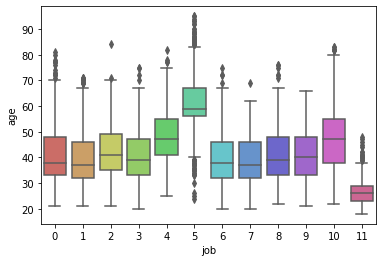

In [49]:
sb.boxplot(x="job",y="age",data=bank,palette="hls")  

<AxesSubplot:xlabel='default', ylabel='age'>

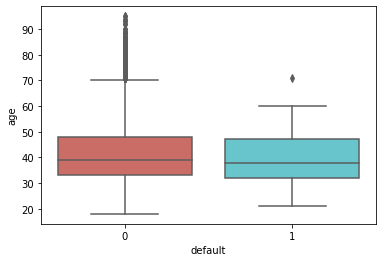

In [50]:
sb.boxplot(x="default",y="age",data=bank,palette="hls")  

<AxesSubplot:xlabel='housing', ylabel='age'>

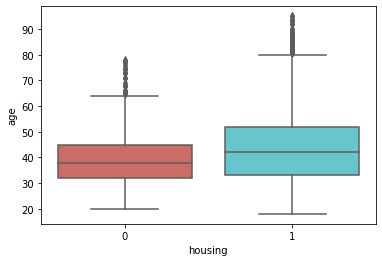

In [51]:
sb.boxplot(x="housing",y="age",data=bank,palette="hls")  

<AxesSubplot:xlabel='loan', ylabel='age'>

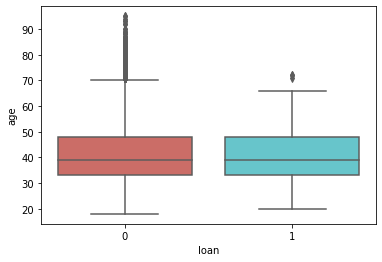

In [52]:
sb.boxplot(x="loan",y="age",data=bank,palette="hls")  

<AxesSubplot:xlabel='y', ylabel='age'>

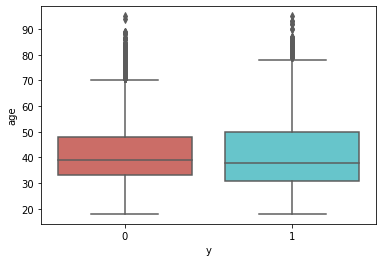

In [53]:
sb.boxplot(x="y",y="age",data=bank,palette="hls")  

<AxesSubplot:xlabel='default', ylabel='count'>

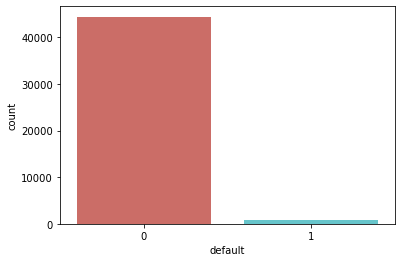

In [54]:
sb.countplot(x="default",data=bank,palette="hls") 


<AxesSubplot:xlabel='loan', ylabel='count'>

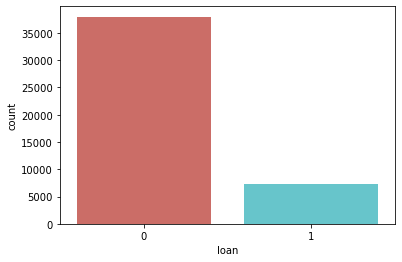

In [55]:
sb.countplot(x="loan",data=bank,palette="hls") 


<AxesSubplot:xlabel='housing', ylabel='count'>

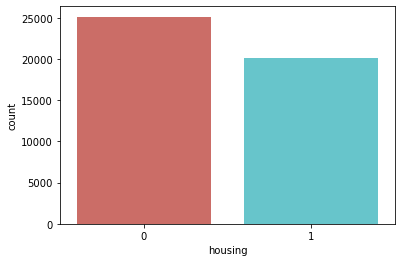

In [56]:
sb.countplot(x="housing",data=bank,palette="hls") 


<AxesSubplot:xlabel='y', ylabel='count'>

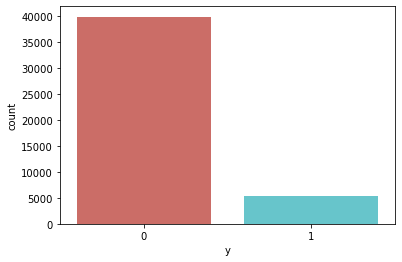

In [57]:
sb.countplot(x="y",data=bank,palette="hls") 


<AxesSubplot:xlabel='age', ylabel='count'>

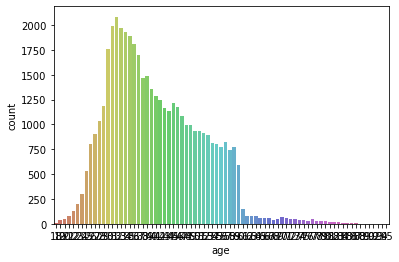

In [58]:
sb.countplot(x="age",data=bank,palette="hls") 


<AxesSubplot:xlabel='marital', ylabel='count'>

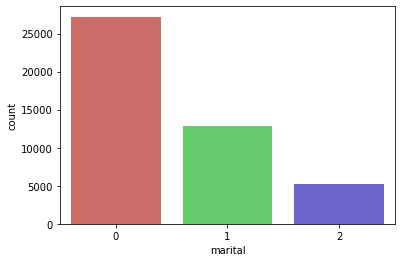

In [59]:
sb.countplot(x="marital",data=bank,palette="hls") 


<AxesSubplot:xlabel='month', ylabel='count'>

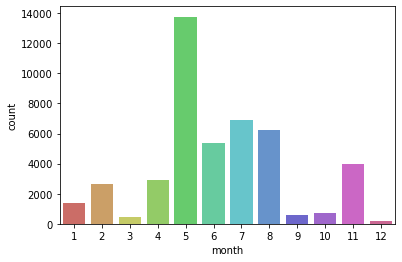

In [60]:
sb.countplot(x="month",data=bank,palette="hls") 


In [61]:
pd.crosstab(bank.age,bank.marital)  

marital,0,1,2
age,,,
18,0,12,0
19,0,35,0
20,3,47,0
21,5,74,0
22,9,120,0
...,...,...,...
90,0,0,2
92,2,0,0
93,2,0,0


<AxesSubplot:xlabel='age'>

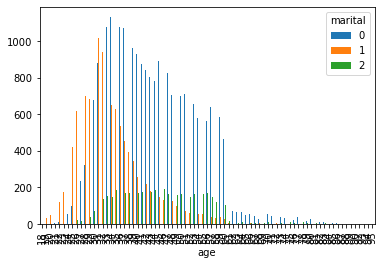

In [62]:
pd.crosstab(bank.age,bank.marital).plot(kind = 'bar')  

In [63]:
pd.crosstab(bank.age,bank.loan)  

loan,0,1
age,,
18,12,0
19,35,0
20,47,3
21,71,8
22,117,12
...,...,...
90,2,0
92,2,0
93,2,0


<AxesSubplot:xlabel='housing'>

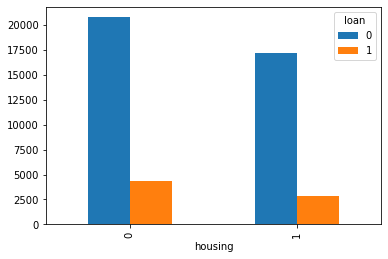

In [64]:
pd.crosstab(bank.housing,bank.loan).plot(kind = 'bar')  

<AxesSubplot:xlabel='default'>

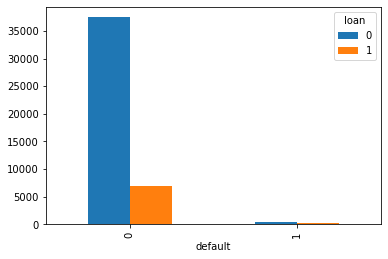

In [65]:
pd.crosstab(bank.default,bank.loan).plot(kind = 'bar')  

In [66]:
# Model building 
from sklearn.linear_model import LogisticRegression
bank.shape   

(45211, 17)

In [100]:
X =bank.iloc[:,0:16]
Y=bank.iloc[:,16]
classifier = LogisticRegression()
classifier.fit(X,Y) 

C:\Users\berri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
classifier.coef_  # coefficients of features   

array([[-3.48266649e-02, -7.63897821e-02, -1.29866573e-02,
        -6.05697312e-02, -2.43180751e-03,  4.32305610e-05,
         5.36796707e-02, -2.47661859e-02,  2.64460112e-02,
        -2.92724068e-02, -1.15554901e-01,  3.30122863e-03,
        -1.70074151e-01,  6.24429499e-04,  7.25267938e-02,
         1.00297371e-01]])

In [104]:
classifier.predict_proba (X) # Probability values   

array([[0.88081108, 0.11918892],
       [0.89254749, 0.10745251],
       [0.88803911, 0.11196089],
       ...,
       [0.71661229, 0.28338771],
       [0.95034172, 0.04965828],
       [0.75663986, 0.24336014]])

In [106]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
y_pred_df=pd.DataFrame({'actual':y,'predicted':classifier.predict(x)})
y_pred_df

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [109]:
classifier.score(X,Y)

0.8871071199486851

In [81]:
y_pred = classifier.predict(x)
bank["y_pred"] = y_pred
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,0,0,0,0,2143,0,0,0,5,5,261,1,-1,0,0,0,0
1,44,1,1,1,0,29,0,0,0,5,5,151,1,-1,0,0,0,0
2,33,2,0,1,0,2,0,1,0,5,5,76,1,-1,0,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,5,92,1,-1,0,0,0,0
4,33,4,1,2,0,1,1,0,0,5,5,198,1,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,11,977,3,-1,0,0,1,0
45207,71,5,2,3,0,1729,1,0,1,17,11,456,2,-1,0,0,1,0
45208,72,5,0,1,0,5715,1,0,1,17,11,1127,5,184,3,3,1,0
45209,57,3,0,1,0,668,1,0,2,17,11,508,4,-1,0,0,0,0


In [82]:
y_prob = pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))
new_df = pd.concat([bank,y_prob],axis=1)
new_df  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,58,0,0,0,0,2143,0,0,0,5,5,261,1,-1,0,0,0,0,0.880811,0.119189
1,44,1,1,1,0,29,0,0,0,5,5,151,1,-1,0,0,0,0,0.892547,0.107453
2,33,2,0,1,0,2,0,1,0,5,5,76,1,-1,0,0,0,0,0.888039,0.111961
3,47,3,0,2,0,1506,0,0,0,5,5,92,1,-1,0,0,0,0,0.927761,0.072239
4,33,4,1,2,0,1,1,0,0,5,5,198,1,-1,0,0,0,0,0.860091,0.139909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,11,977,3,-1,0,0,1,0,0.696494,0.303506
45207,71,5,2,3,0,1729,1,0,1,17,11,456,2,-1,0,0,1,0,0.972110,0.027890
45208,72,5,0,1,0,5715,1,0,1,17,11,1127,5,184,3,3,1,0,0.716612,0.283388
45209,57,3,0,1,0,668,1,0,2,17,11,508,4,-1,0,0,0,0,0.950342,0.049658


In [110]:
#confusion matrix

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)   

[[39259   663]
 [ 4441   848]]


# pd.crosstab(y_pred,y)  

In [84]:
#type(y_pred)
accuracy = sum(y==y_pred)/bank.shape[0]
accuracy 

0.8871071199486851

In [94]:
from sklearn.metrics import classification_report 
print (classification_report (y, y_pred))  

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



In [112]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y,classifier.predict(X))
Logit_roc_score  

0.5718626908593898

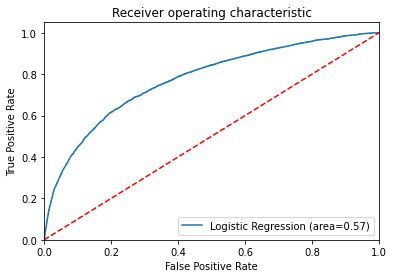

In [117]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

In [118]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 

In [119]:
y_prob1 

,0
0,0.119189
1,0.107453
2,0.111961
3,0.072239
4,0.139909
...,...
45206,0.303506
45207,0.027890
45208,0.283388
45209,0.049658


In [120]:
import statsmodels.api as sm   

In [121]:
logit = sm.Logit(Y, X)   

In [122]:
logit.fit().summary()  

Optimization terminated successfully.
         Current function value: 0.280277
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Mon, 24 Oct 2022   Pseudo R-squ.:                  0.2233
Time:                        15:20:35   Log-Likelihood:                -12672.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0476      0.001    -36.704      0.000      -0.050      -0.045
job           -0.0315      0.005     -6.010      0.000      -0.042      -0.021
marital       -0.1566      0.025     -6.290      0.000      -0.205      -0.108
education     -0.2168      0.020    -10.769      0.000      -0.256      -0.177
default       -0.3477      0.158     -2.199      0.028      -0.657      -0.038
balance     1.921e-05   4.83e-06      3.979      0.000    9.75e-06    2.87e-05
housing        0.8378      0.036     23.561      0.000       0.768       0.907
loan          -0.8056      0.056    -14.425      0.000      -0.915      -0.696
contact        0.3163      0.035      9.125      0.000       0.248       0.384
day           -0.0319      0.002    -16.854      0.000      -0.036      -0.028
month         -0.1160      0.006    -18.936      0.000      -0.128      -0.104
duration       0.0035    5.8e-05     60.093      0.000       0.003       0.004
campaign      -0.2082      0.011    -18.757      0.000      -0.230      -0.186
pdays         -0.0029      0.000    -13.153      0.000      -0.003      -0.002
previous      -0.0083      0.008     -1.094      0.274      -0.023       0.007
poutcome       0.9379      0.026     35.817      0.000       0.887       0.989
==============================================================================
"""

In [123]:
fpr 

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.96167527e-01, 9.96167527e-01, 1.00000000e+00])

In [124]:
tpr  

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])